# 1. Importing the dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/udipt/Desktop/DT,RF,AdaBoost and XGboost/Data Files/Movie_classification.csv')
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [3]:
df['Start_Tech_Oscar'].mean()

0.5454545454545454

# 2. Preprocessing

## 2.1 Missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             494 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
Start_Tech_Oscar       506 non-null int64
dtypes: float64(12), int64(5), object(2)
memory usage: 75.2+ KB


In [5]:
md=df['Time_taken'].median()
print(md)

160.0


In [6]:
df['Time_taken'].fillna(md,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
Marketing expense      506 non-null float64
Production expense     506 non-null float64
Multiplex coverage     506 non-null float64
Budget                 506 non-null float64
Movie_length           506 non-null float64
Lead_ Actor_Rating     506 non-null float64
Lead_Actress_rating    506 non-null float64
Director_rating        506 non-null float64
Producer_rating        506 non-null float64
Critic_rating          506 non-null float64
Trailer_views          506 non-null int64
3D_available           506 non-null object
Time_taken             506 non-null float64
Twitter_hastags        506 non-null float64
Genre                  506 non-null object
Avg_age_actors         506 non-null int64
Num_multiplex          506 non-null int64
Collection             506 non-null int64
Start_Tech_Oscar       506 non-null int64
dtypes: float64(12), int64(5), object(2)
memory usage: 75.2+ KB


## 2.2 Dummy variables

In [8]:
df=pd.get_dummies(df,columns=['3D_available','Genre'])

In [9]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_NO,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,23,494,48000,1,0,1,0,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,42,462,43200,0,1,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,38,458,69400,1,1,0,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,45,472,66800,1,0,1,0,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,55,395,72400,1,1,0,0,0,1,0


In [10]:
df=df.drop('3D_available_NO',axis=1)
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Action,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,223.840,23,494,48000,1,1,0,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,243.456,42,462,43200,0,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,2022.400,38,458,69400,1,0,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,225.344,45,472,66800,1,1,0,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,225.792,55,395,72400,1,0,0,0,1,0


## 2.3 Dependent and independent variables


In [11]:
x=df.drop('Start_Tech_Oscar',axis=1)
y=df['Start_Tech_Oscar']

# 3. Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=0.2,random_state=0)

# 4. Building the model

## 4.1 Training the model

In [14]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier(max_depth=5)

In [15]:
clftree.fit(x_tr,y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
y_tr_pred=clftree.predict(x_tr)
y_te_pred=clftree.predict(x_te)

In [17]:
y_te_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1], dtype=int64)

## 4.2 Model accuracy

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,roc_auc_score

In [19]:
#For training model
confusion_matrix(y_tr,y_tr_pred)

array([[150,  36],
       [ 74, 144]], dtype=int64)

In [20]:
#For test model
confusion_matrix(y_te,y_te_pred)

array([[28, 16],
       [27, 31]], dtype=int64)

In [21]:
accuracy_score(y_te,y_te_pred)

0.5784313725490197

In [22]:
f1_score(y_te,y_te_pred)

0.5904761904761905

In [24]:
roc_auc_score(y_te,y_te_pred)

0.585423197492163

# 5. Plotting the tree

In [22]:
dot_data=tree.export_graphviz(clftree,feature_names=x_tr.columns,filled=True,proportion=True)

In [23]:
from IPython.display import Image
import pydotplus

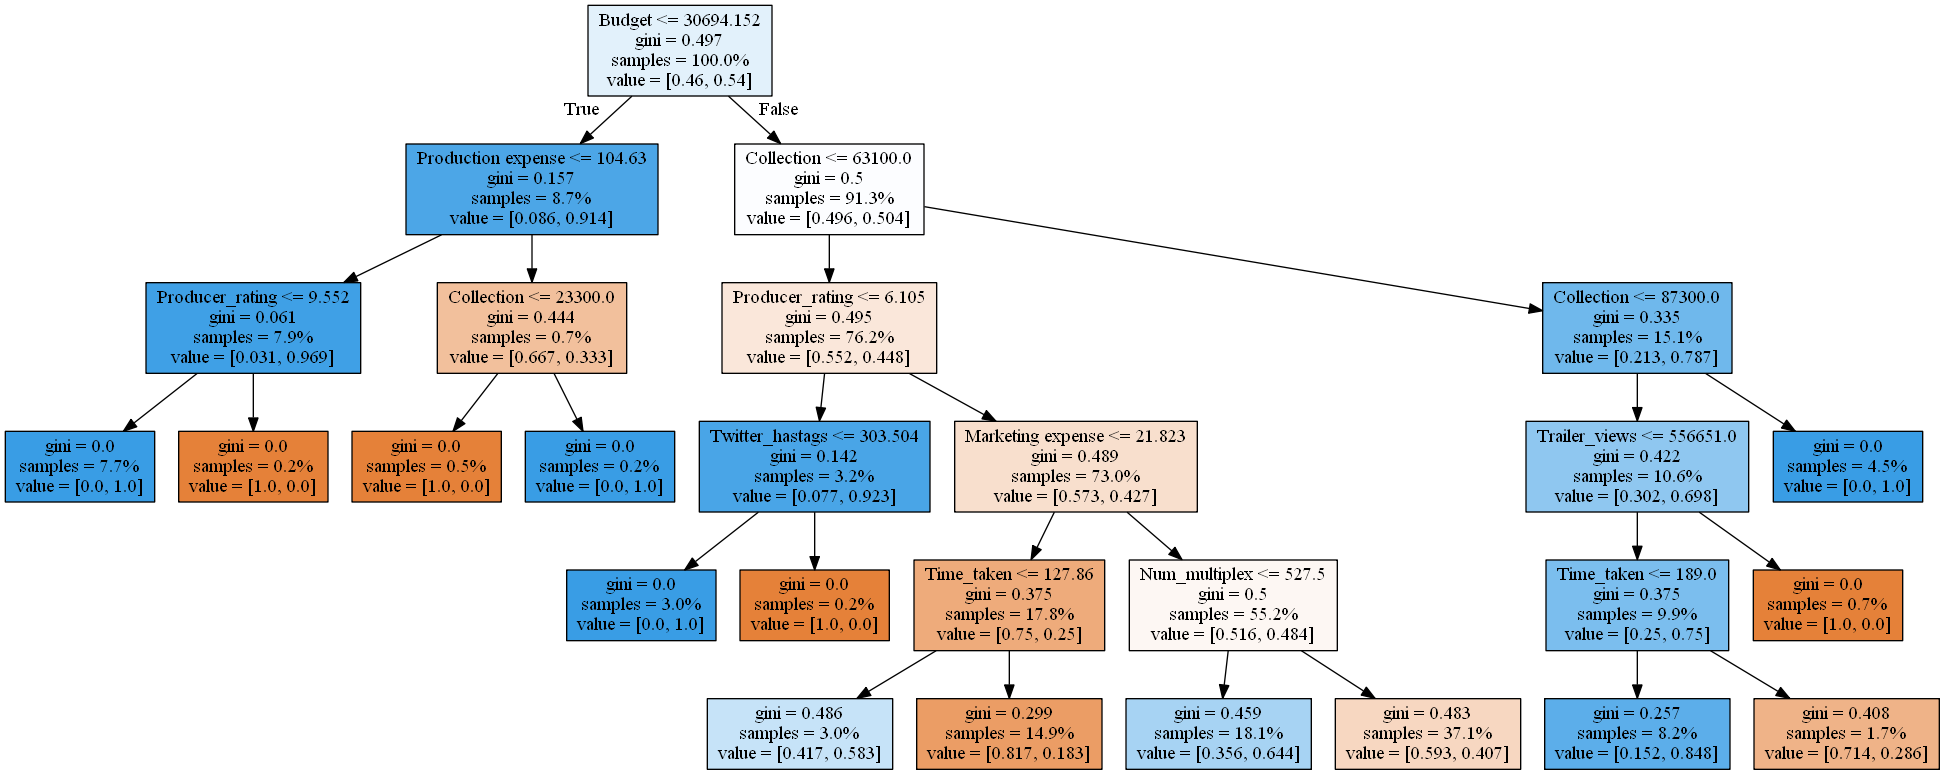

In [24]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# 6. Random forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rf=RandomForestClassifier(n_estimators=10000,n_jobs=-1,random_state=42)

In [27]:
rf.fit(x_tr,y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [28]:
accuracy_score(y_te,rf.predict(x_te))

0.6274509803921569

In [32]:
f1_score(y_te,rf.predict(x_te))

0.6724137931034483

In [31]:
roc_auc_score(y_te,rf.predict(x_te))

0.6202978056426331

# 7. XGboost

In [33]:
import xgboost as xgb

In [34]:
xg_clf=xgb.XGBClassifier(max_depth=5,n_estimators=10000,learning_rate=.2,n_jobs=-1)

In [35]:
xg_clf.fit(x_tr,y_tr)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10000, n_jobs=-1, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
accuracy_score(y_te,xg_clf.predict(x_te))

0.7156862745098039

In [39]:
f1_score(y_te,xg_clf.predict(x_te))

0.752136752136752

In [38]:
roc_auc_score(y_te,xg_clf.predict(x_te))

0.7088557993730408